### idea 
user input his(personality test answers)and the system recommeds his matching Cats 


### metodology 
since our users don't have any prior preferences towards Cats(USER COLD START problem) we have to start with this:

#### version 1 
1. Finding **nearset user**: the system takes user input (personality test answers) then finds the nearsest user (the most similar one) from our DataSet
    - for better pridections : we filterd out users with staisfacton level blow 0.8 

2. we get the nearest user - **Connceted Cat** (from the DataSet)

####  version 2 
same as vesrion 1 but builds on it 

- based on the **Connceted Cat** the system recommends the nearset cat from an external data set "Cat_dataset_online"
- Adv:cats and adopters datasets are indepentant 


some notes: 

- there isn't any active learning,the system just recommends based on the Dataset (aka. the scale where every user get his recommended cat)  
- due to the DataSet setup, each user is exposed to one and only one Cat (Aka. each user rates one Cat). so we are forced to use "**user_based** collaborative filtering", in Addition satisfaction here is based on live -interaction between the Adopter and the cat for some time, so the satisfaction is a reliable scale 




###  for relasing this we need 

- **urgent** evaluation of the recommender ( write a reveiw on the results)
- function for inserting the questionare results then append them to the Dataset 
- **impotant** try another algorism  (cosine simlarity done .... may evalute it according to coverage)


##### done 
-  encapsulationg the version 2 into a proper function 
-  Cats random names feature 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/wt21-pet-match/blob/main/ds_documentation/data_set/data_cleaned/all_cleaned_num.xlsx?raw=true')

#df.describe()

In [3]:
df = df.set_index('id').drop(columns = 'breed')

In [4]:
df.head()

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00


## Random Cat-Names feature

- to for the easy identifaction of Cats 

In [5]:
# pip install names
import names

In [6]:
def Random_names(i):
    
    while i < len(df):
        if df["cat_gender"][df.index[i]] == 1:
            return str(names.get_first_name(gender='male'))
        else:
            return str(names.get_first_name(gender='female'))
        

In [7]:
temp_names = []
for n in df.index:
    random_name=Random_names(n)
    temp_names.append(random_name)
    
#print(temp_names)

df["cat_name"] = temp_names 


In [8]:
df

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level,cat_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00,Larry
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00,Stacy
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85,William
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00,Aileen
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00,Lucy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,12,2,1,1,1,3,5,5,3,4,4,1,4,2,5,4,5,2,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4,1.00,Pamela
3327,7,1,2,1,1,3,5,4,3,4,3,1,4,1,5,5,4,2,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5,1.00,Chris
3328,4,1,1,1,1,3,5,5,5,5,1,1,5,2,5,5,5,1,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4,1.00,William


## filtering out the unstisfied users 

- nearly 58% are fully staisfied (satisfaction = 1), while (~10%) are blew 0.8 satisfaction.
- since the recommender needs the users and Adopters to be high satisfied we choose to remove subjects with satisfaction less than 0.8 

<AxesSubplot:title={'center':'Satisfaction Distribution'}>

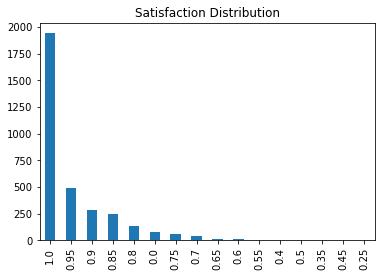

In [9]:
df['satisf_level'].value_counts().plot(kind='bar',title='Satisfaction Distribution' ,label= '.')


In [10]:
df['satisf_level'].value_counts(normalize = True)

1.00    0.582408
0.95    0.147403
0.90    0.085860
0.85    0.075053
0.80    0.039928
0.00    0.024917
0.75    0.018613
0.70    0.011408
0.65    0.003903
0.60    0.003603
0.55    0.002402
0.40    0.001501
0.50    0.001501
0.35    0.000600
0.45    0.000600
0.25    0.000300
Name: satisf_level, dtype: float64

In [11]:
df_happy = df.loc[df["satisf_level"] > 0.8].drop(columns=["satisf_level"]).reset_index(drop=True)
df_happy.shape

(2967, 38)

## Finding nearest user ( using correlation matrix )

In [12]:
# setting up a subset for the users_only features 
df_adopters = df_happy.loc[:, "adopter_gender":"efficient"]
df_adopters

,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient
0,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4
1,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5
2,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0
3,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3
4,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4
2963,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5
2964,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4
2965,2,3,1,1,4,4,4,1,5,2,3,5,4,4,1,5,5,2,5


In [13]:
# create utility matrix table to study the user and book relation
df_pivot=df_adopters.transpose()
df_pivot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,

In [14]:
##to cheak no. of people who didnt fill at least half of the questionnare , only 75 persons so it is negegable 

df_pivot[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

False    2892
True       75
dtype: int64

In [15]:
x=df_pivot.values.T  
x.shape

(2967, 19)

In [16]:
corr_mat = np.corrcoef(x)

###another methoud using Dataframe 
#df_matrix= df_pivot.corr(method='pearson')
#df_matrix




the nearest 10 adopters  to  17  are


,ID_matching,correlation,cat_name
17,17,1.000000,Jerry
2740,2740,0.986048,Brandon
1188,1188,0.984706,Kyle
292,292,0.982596,Willie
860,860,0.979244,Barry
1224,1224,0.978913,Tracy
656,656,0.978618,Kimberly
1725,1725,0.977027,Dennis
1941,1941,0.974993,Catherine
2068,2068,0.973759,George


## Recommendation for Adopter (enter value)

In [272]:
user_input = 17

Adopter_names = df_pivot.columns
Cat_names = df_happy["cat_name"].tolist()
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(user_input ) 
corr_Adopter = corr_mat[Adopter_index] 

## users are named with numbers for now 

### get their connceted cats 

this approch is not the best, as we recommend cats from our offline Data set ... it is better to get cats from separte Dataset (recommender_2 ) 

In [273]:
corr_Adopter = corr_mat[Adopter_index] 
corr_Adopter.shape

tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
print("the nearest 10 adopters  to ",Adopter_index ," are")
tuples_df.sort_values(by = "correlation", ascending = False).iloc[0:10]


the nearest 10 adopters  to  17  are


,ID_matching,correlation,cat_name
17,17,1.000000,Jerry
2740,2740,0.900869,Brandon
1188,1188,0.890847,Kyle
292,292,0.876580,Willie
1224,1224,0.874159,Tracy
847,847,0.855683,David
860,860,0.850737,Barry
656,656,0.848487,Kimberly
853,853,0.846810,Charles
1941,1941,0.835498,Catherine


### Analyzing the correlation results 
- note:here the recommender predict user input(correlation =1) as best choice, that validate that the results can be reliable
- we decided to look into +ve correlaltion numbers and anyalize it 

       ID_matching   correlation
count  2325.000000  2.325000e+03
mean   1476.389677  2.330112e-01
std     853.679788  1.837504e-01
min       0.000000  1.175792e-17
25%     742.000000  9.215965e-02
50%    1457.000000  1.871658e-01
75%    2207.000000  3.242424e-01
max    2966.000000  1.000000e+00


<AxesSubplot:title={'center':'correlation Distribution'}>

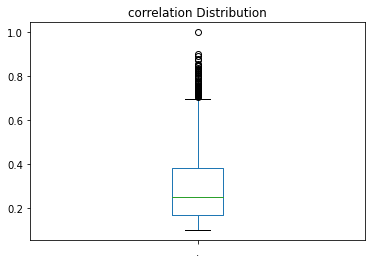

In [152]:
print(tuples_df.loc[tuples_df["correlation"]> 0].describe())

#analyzing the correlation numbers bigger than 1

tuples_df.loc[tuples_df["correlation"]> 0.1]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

<AxesSubplot:title={'center':'correlation Distribution'}>

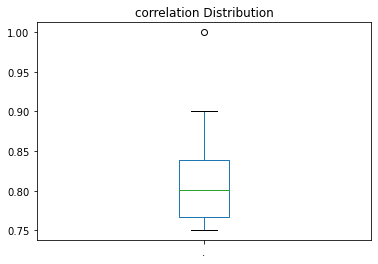

In [153]:
## with closer look into numbers around the 75% percentile   
tuples_df.loc[tuples_df["correlation"]> 0.75]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

- from here we can say that the outliers *above 0.85 correlation* are the ones who Can perform solid good prediction 

(this is exploratory analysis for further results cheak **Evalutation part** )

## Evaluation 
- for recommender evaluation, we used (Accuracy , Covrage Tests)
- to evalute the preformance we thought of clastering the pridections into clasters (aka. changing the result into a binary system)as follows:
    - relevant recommendation = correlation above 0.85
    - not relevant recommendation = else 
    
what column needed:
- reommendation clastering  .. to change it into Binary Classifier problem 
 Note : due to Dataset limition, as every Adopter rated one and only one cat, we couldnt varify both the False postive and , False negative  (aka. i cant measure the Precision and recall 
 




[calculting Precision and Recall of Recommender Systems](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#MAP-for-Recommender-Algorithms)

### Calculating Accuracy

In [190]:
df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.85).sum())#.replace({1: "good", 0: "bad"})
df_eval

,ID_matching,correlation,cat_name,Relevant_recommendation
2740,2740,0.900869,Brandon,1
1188,1188,0.890847,Kyle,1
292,292,0.876580,Willie,1
1224,1224,0.874159,Tracy,1
847,847,0.855683,David,1
860,860,0.850737,Barry,1
656,656,0.848487,Kimberly,0
853,853,0.846810,Charles,0
1941,1941,0.835498,Catherine,0
1725,1725,0.831266,Dennis,0


In [213]:

Accuracy  = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
print ("Accuracy value for user",user_input,"is" ,Accuracy  )
#possible_relevant_items = df_eval['Relevant_recommendation'].value_counts()[0]
#df_eval['Relevant_recommendation'].sum()/len(df_eval)



Accuracy value for user 17 is 60.0


In [214]:
## input : user ID , ## the def takes user ID and gives 

def recommender_single_user_Accuracy  (name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
            df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.85).sum())
            Accuracy = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
            #print ("Accuracy  values for user",name,"is" ,Accuracy ) ## for loop cheak
            return Accuracy 
        

    except:
        print("Error in id input")
        recommend_cat_eval(name) 


In [215]:
recommender_single_user_Accuracy (17)

60.0

In [217]:
Adopter_total_Accuracy =[]
for n in [0,1,2,3,4,5]:
    recommender_single_user_Accuracy (n)
    Adopter_total_Accuracy .append(recommender_single_user_Accuracy (n))

print(Adopter_total_Accuracy)
average_Accuracy = sum(Adopter_total_Accuracy )/len (Adopter_total_Accuracy ) 
average_Accuracy 

[80.0, 100.0, 100.0, 100.0, 10.0, 0.0]


65.0

In [223]:
## this def makes a sample Dataframe from the Dataset then calcultes the presision  ##

## input : random state of the sample Dataframe , the % of the Dataframe sample  

def Accuracy  (random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    Adopter_total_Accuracy =[]
    for n in df_adopters_Test.index :
        recommender_single_user_Accuracy(n)
        Adopter_total_Accuracy.append(recommender_single_user_Accuracy (n))
    Adopter_total_Accuracy
    
    average_Accuracy = sum(Adopter_total_Accuracy )/len (Adopter_total_Accuracy ) 

    print ("average_Accuracy is")
    return average_Accuracy 

In [228]:
Accuracy (100,0.8)

average_Accuracy is


66.1038148843027

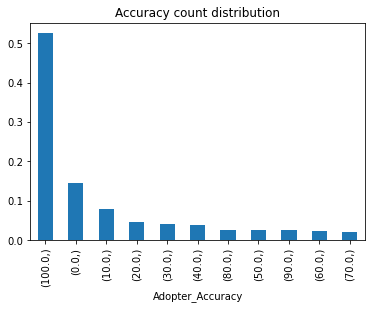

In [229]:
df_pres_count = pd.DataFrame(data =Adopter_total_Accuracy, columns= ["Adopter_Accuracy"]).value_counts(normalize=True)
count_distribution=df_pres_count.plot(kind='bar',title='Accuracy count distribution')

## caluating Coverage
Steps 
- make a random sample of Adopter Dataset
- get 10 recommendation for each Adopter from this list (excluding the cat with the same ID as user)
- make a list of reommended Cats IDs 
- count unique catID
- coverage = num_unique_catIDs / number of recommendations (10*num_users)


 do this in three cycles and calcate the mean Coverage

In [70]:
# setting a test Datset of Adopter
df_adopters_Test_cover=df_adopters.sample(frac=0.1, replace=True, random_state=100).drop_duplicates()


In [24]:
### recommender for evalutating coverage ###
## input : Adopter ID      ## output : ist of reommended Cats IDs


def recommend_cat_eval(name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            #print("the nearest 10 cats to ",Adopter_index ," are")
            df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
            #df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.9).sum())
            #acc = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
            #print ("accurency value for user",user_input,"is" ,acc )
            return df_eval['ID_matching'].unique()
        

    except:
        print("Error in id input")
        recommend_cat_eval(name) 

In [25]:
# testing ##
recommend_cat_eval(20)

array([ 513, 1444, 1646, 2762,  798,  438,   48,  170, 1002,  997],
      dtype=int64)

In [26]:
## testing for all users , #### Can be deleted ####
Sample_num = len(df_adopters_Test.index)
recomnneded_catIDs =[]
for n in df_adopters_Test.index :
    recommend_cat_eval(n)
    recomnneded_catIDs.extend(recommend_cat_eval(n))
    
recomnneded_catIDs

#print (recomnneded_catIDs)

unique_cat_recommended = len(set(recomnneded_catIDs))
no_of_recommendations = 10*Sample_num
coverage_test= (unique_cat_recommended/no_of_recommendations)*100
print ("coverage is" ,coverage_test )

coverage is 58.8421052631579


In [27]:
## this def makes a sample Dataframe from the Dataset then calcultes the coverage ##

## input : random state of the sample Dataframe , the % of the Dataframe sample 
## dependancey : recommend_cat_eval, Adopters Dataset 

def coverage(random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    recomnneded_catIDs =[]
    for n in df_adopters_Test.index :
        recommend_cat_eval(n)
        recomnneded_catIDs.extend(recommend_cat_eval(n))

    recomnneded_catIDs
    unique_cat_recommended = len(set(recomnneded_catIDs))
    no_of_recommendations = 10*Sample_num
    coverage= (unique_cat_recommended/no_of_recommendations)*100
    print ("coverage is" ,coverage )
    return coverage

In [28]:
coverage(100,0.1)
coverage(12,0.1)
coverage(50,0.1)
coverage(1002,0.1)
coverage(9,0.1)

coverage is 58.8421052631579
coverage is 58.08510638297872
coverage is 59.049295774647895
coverage is 57.24014336917562
coverage is 57.70318021201414


57.70318021201414

#### the mean coverage for recommender 1 is roughly 58.2% on a sample of 10% of our Dataset 

In [29]:
coverage(100,0.5)
coverage(12,0.5)
coverage(50,0.5)

coverage is 23.60352422907489
coverage is 23.330442324371205
coverage is 22.707460184409054


22.707460184409054

#### the mean coverage for recommender 1 is roughly 23% on a sample of 50% of our Dataset 

In [63]:
coverage(100,1)

coverage is 15.40511147362697


15.40511147362697

#### the coverage for recommender 1 is roughly 15% on a sample of 95% of our Dataset 

## recommender 1_using correlation matrix (input value) 

In [31]:
 def recommend_cat(df_pivot, corr_mat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
        

        else:
            name=" "+name
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 adopters  to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

## recommender 1_using cosine similarity (input value) 

In [ ]:
## another engine consine simlatiy 
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_mat = cosine_similarity(x)

In [277]:
def recommend_cat_cosine(df_pivot):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list1 = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            cos_Adopter = cos_sim_mat[Adopter_index] 
            tuples2 = list(zip(Adopter_names,cos_Adopter,Cat_names))
            tuples_df2 = pd.DataFrame(data =tuples2, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(tuples_df2.sort_values(by = "correlation", ascending = False).iloc[1:11])
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

In [280]:
recommend_cat(df_pivot, corr_mat)

Enter the Adopter name you want to match: 1
the nearest 10 cats to  1  are
      ID_matching  correlation cat_name
231           231     0.924178     Tony
763           763     0.909912   Travis
1658         1658     0.906302   Joseph
874           874     0.902332  William
2824         2824     0.901213  Melissa
946           946     0.900186   Amanda
514           514     0.893698    Ellis
1702         1702     0.893398   Ashley
1974         1974     0.892424    Maria
2074         2074     0.891720     Cole


In [281]:
recommend_cat_cosine(df_pivot)

Enter the Adopter name you want to match: 1
the nearest 10 cats to  1  are
      ID_matching  correlation cat_name
231           231     0.988593     Tony
763           763     0.986329   Travis
1658         1658     0.986053   Joseph
2824         2824     0.984848  Melissa
946           946     0.984387   Amanda
1974         1974     0.984087    Maria
2526         2526     0.983700    Laura
1702         1702     0.983467   Ashley
2109         2109     0.983328    Tracy
2358         2358     0.983015       Al


## Recommender 2 

### find  nearset Cat using (correlation matrix of cat to simulate the separtion of Cat /Owner Data)
- to match the separtion between cats and adopter Dataset 
- to test the diffrence we splitted the Cat Dataset, producing a subset of the original Data (20% of the data)
- to avoid confusion the cat ID are coded with "C" symbol for the online version  

In [32]:
## note: making Cat ids to avoid confusion 


df_cats = df_happy.loc[:, "cat_age":"fearful"] 

df_cats_online=df_cats.sample(frac=0.2, replace=True, random_state=100).drop_duplicates()

# to cheak for duplictes using .sample
#print(len(df_cats["ID-cat"].unique()))
#print(len(df_cats_online["ID-cat"].unique()))
#len(df_cats_online["ID-cat"])

In [33]:
df_cats_online["ID-cat"] =  "C-" + df_cats_online.index.astype(str)
df_cats_online = df_cats_online.set_index("ID-cat")

In [34]:
df_cats_online

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful
ID-cat,,,,,,,,,,,,,,,,,,
C-1544,1,1,1,2,1,3,5,5,3,5,1,1,5,1,5,5,5,1
C-2840,10,1,2,2,1,3,3,4,5,4,1,1,5,3,5,5,5,1
C-1859,4,1,2,1,1,3,5,5,1,4,4,1,3,2,5,5,4,4
C-79,5,1,2,1,1,3,5,5,5,4,3,1,3,1,3,3,5,1
C-1930,7,2,2,1,1,3,5,4,3,4,3,1,3,2,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C-1103,6,2,2,1,2,3,4,3,1,5,2,3,4,2,5,5,5,3
C-2441,12,2,2,2,1,3,3,3,4,4,2,1,4,1,5,5,5,2
C-840,3,2,1,1,2,3,1,4,5,1,5,1,2,3,3,1,5,5


In [35]:
cat_Ids = df_cats_online.index

### testing with user input 

In [36]:
##adopter things 
Adopter_names = df_pivot.columns
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(20)
Cat_names = df_happy["cat_name"].tolist()

#applying the logic 
corr_Adopter = corr_mat[Adopter_index]


#best Adopter
best_adopter = list(zip(Adopter_names,corr_Adopter))
df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
print("the nearest adopter to ",Adopter_index ," is")
print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

# extracting best data from the offline Dataset
best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index


best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] ## extracting the conncected cat part 
best_cat 


the nearest adopter to  20  is
     ID_Adopter  correlation_Adopter
513         513             0.970695


cat_age                 11
cat_gender               2
needs_outdoor            2
medical_conditions       1
behavioural_problems     1
cat_weight               3
likes_to_explore         3
playful                  1
vocal                    4
picked_up                1
timid                    5
aggressive               3
adapts_quickly           1
prefers_alone            3
likes_stroke             4
tolerant_handled         2
friendly                 3
fearful                  5
Name: 513, dtype: object

In [37]:
#adding our imaginary best cat to the online cat_dataset

df_cats_online_new =df_cats_online.append(best_cat , sort=False) ## in case idex dont match 

df_pivot_cat=df_cats_online_new.transpose()
df_pivot_cat

##to cheak no. of people who didnt fill at least half of the questionnare 
#df_pivot_cat[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

ID-cat,C-1544,C-2840,C-1859,C-79,C-1930,C-350,C-1972,C-1890,C-53,C-1602,C-1550,C-802,C-1009,C-2800,C-280,C-1679,C-1899,C-1340,C-2960,C-1531,C-1673,C-2134,C-2434,C-1691,C-1900,C-1924,C-2463,C-897,C-2805,C-1747,C-612,C-1028,C-2651,C-2883,C-135,C-2097,C-2365,C-782,C-763,C-2,C-889,C-617,C-2526,C-1427,C-2111,C-283,C-1393,C-806,C-2220,C-274,C-2240,C-437,C-1738,C-273,C-1608,C-1549,C-618,C-17,C-2116,C-488,C-2523,C-2003,C-2741,C-2894,C-13,C-1209,C-1484,C-2410,C-131,C-2630,C-1667,C-1236,C-394,C-1239,C-495,C-643,C-2921,C-1200,C-1835,C-2084,C-1797,C-839,C-2086,C-1118,C-2786,C-1194,C-2900,C-2143,C-1650,C-1100,C-2362,C-2150,C-938,C-2454,C-2810,C-1719,C-226,C-915,C-1845,C-2244,C-446,C-818,C-1476,C-2467,C-407,C-765,C-1813,C-409,C-262,C-1701,C-1894,C-1652,C-1210,C-1758,C-1843,C-2334,C-2626,C-243,C-439,C-2321,C-813,C-1509,C-2137,C-429,C-803,C-1040,C-1548,C-2669,C-1091,C-2268,C-788,C-2186,C-2824,C-473,C-2760,C-1438,C-1932,C-1682,C-1373,C-2935,C-1628,C-556,C-1081,C-2431,C-768,C-1609,C-1768,C-694,C-1858,C-1413,C-1459,C-346,C-2082,C-451,C-862,C-1998,C-2742,C-1101,C-212,C-2433,C-1038,C-1907,C-148,C-2216,C-2490,C-796,C-2002,C-2770,C-514,C-2623,C-2929,C-145,C-1274,C-477,C-736,C-2122,C-1822,C-668,C-1106,C-998,C-1425,C-653,C-2641,C-2933,C-2841,C-655,C-364,C-2170,C-2059,C-2661,C-1908,C-1814,C-2871,C-313,C-87,C-2739,C-1968,C-754,C-2045,C-506,C-1681,C-705,C-172,C-144,C-1206,C-2231,C-83,C-502,C-1578,C-1981,C-2808,C-2806,C-1829,C-1648,C-2161,C-465,C-2576,C-1094,C-994,C-1760,C-2953,C-2927,C-674,C-870,C-1163,C-1821,C-1885,C-2724,C-597,C-2652,C-2675,C-2372,C-119,C-829,C-2141,C-1522,C-804,C-2602,C-2829,C-304,C-2514,C-2592,C-2342,C-1320,C-2545,C-1422,C-38,C-628,C-214,C-1189,C-2176,C-872,C-2747,C-809,C-2189,C-2040,C-2135,C-2113,C-324,C-2230,C-2688,C-2391,C-1619,C-2826,C-2793,C-833,C-1154,C-2263,C-2087,C-758,C-1316,C-1315,C-1635,C-659,C-2180,C-1751,C-2634,C-909,C-2721,C-1368,C-2711,C-234,C-1595,C-2552,C-1032,C-1613,C-303,C-2807,C-1817,C-1392,C-1951,C-550,C-2512,C-215,C-468,C-357,C-2108,C-783,C-2451,C-660,C-1155,C-2405,C-11,C-1328,C-1926,C-2705,C-1385,C-2764,C-186,C-456,C-1787,C-2483,C-1659,C-158,C-1646,C-1234,C-1307,C-2374,C-2036,C-1837,C-1319,C-1458,C-942,C-2364,C-1488,C-2128,C-633,C-34,C-1233,C-470,C-1839,C-2943,C-2947,C-375,C-2777,C-1285,C-2754,C-1979,C-649,C-397,C-1347,C-2174,C-2895,C-2294,C-340,C-1871,C-1933,C-2379,C-1585,C-1765,C-2260,C-2854,C-1445,C-1624,C-1939,C-21,C-2048,C-1865,C-2797,C-292,C-1203,C-1057,C-2400,C-854,C-2809,C-410,C-507,C-2646,C-1502,C-2083,C-2835,C-2290,C-1716,C-1961,C-1838,C-690,C-1256,C-77,C-1868,C-2915,C-2027,C-1597,C-1852,C-2706,C-35,C-2103,C-2118,C-1433,C-2783,C-1643,C-698,C-2380,C-700,C-2065,C-1569,C-194,C-990,C-18,C-2534,C-748,C-997,C-1543,C-485,C-1008,C-1214,C-129,C-1791,C-333,C-926,C-2396,C-1680,C-2513,C-1376,C-20,C-1362,C-1510,C-1379,C-2903,C-2299,C-1496,C-2517,C-513,C-491,C-1018,C-478,C-2012,C-603,C-1430,C-1357,C-1712,C-879,C-187,C-1929,C-1477,C-1074,C-62,C-1991,C-817,C-14,C-2049,C-120,C-369,C-2546,C-2489,C-505,C-794,C-594,C-2448,C-563,C-1519,C-866,C-1152,C-1412,C-826,C-6,C-37,C-1108,C-720,C-421,C-1475,C-544,C-1000,C-2966,C-2024,C-284,C-1201,C-1501,C-2247,C-1901,C-300,C-1464,C-2053,C-1120,C-735,C-539,C-481,C-1374,C-604,C-1269,C-1916,C-849,C-2278,C-750,C-2055,C-2519,C-787,C-1878,C-1875,C-1675,C-293,C-1777,C-523,C-1310,C-453,C-961,C-1331,C-2163,C-1061,C-2293,C-2852,C-2343,C-2386,C-297,C-1077,C-518,C-112,C-894,C-895,C-2142,C-2063,C-236,C-2469,C-1593,C-2074,C-2926,C-1261,C-2491,C-1333,C-86,C-1137,C-1468,C-2476,C-1672,C-693,C-2210,C-2308,C-2653,C-992,C-2831,C-1877,C-2371,C-2876,C-1103,C-2441,C-840,C-127,C-2714,513
cat_age,1,10,4,5,7,10,7,5,1,11,6,6,3,2,4,10,3,3,15,4,7,13,9,6,5,13,19,8,3,4,5,5,2,6,7,16,3,5,1,5,6,19,7,9,1,3,2,5,6,2,1,2,1,8,10,2,17,19,2,8,13,17,12,2,13,7,7,5,9,3,2,9,12,7,3,8,5,6,11,4,6,3,12,11,8,8,2,3,3,3,7,14,9,13,3,8,1,13,2,12,3,14,3,5,8,13,16,6,11,3,1,4,8,3,8,7,2,11,3,6,6,3,3,7,8,14,19,4,4,8,1,3,3,14,2,9,12,8,5,2,2,9,4,7,19,6,8,13,4,11,8,19,4,3,2,19,2,17,8,2,7,13,9,21,7,13,14,3,12,14,8,8,7,9,4,4,2,4,8,4,12,10,7,3,4,3

In [38]:

df_matrix= df_pivot_cat.corr(method='pearson')
cat_match =df_matrix[best_cat_index[0]].values

## numpy correrlation didnt work properly 
#x_cat=df_pivot_cat.values.T  
#corr_mat_cat = np.corrcoef(x_cat)
#cat_match= corr_mat_cat[best_cat_index[0]]

In [39]:
#presenting results

matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_origial","correlation_cat","cat_name","ID_Cats_online"])
print("the nearest 10 cats to ",Adopter_index ," are")
matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11]

the nearest 10 cats to  20  are


,ID_origial,correlation_cat,cat_name,ID_Cats_online
421,421,1.000000,Alexander,C-513
9,9,0.963722,Ann,C-1602
241,241,0.942319,Lisa,C-2592
513,513,0.922293,Elizabeth,C-2074
296,296,0.911809,Andrew,C-2108
93,93,0.908475,Ernest,C-2454
217,217,0.898378,Thomas,C-1094
61,61,0.894033,Gary,C-2003
390,390,0.891847,Bessie,C-698
332,332,0.888773,Carmen,C-2947


## def (recommender Version 2.1)
- Advantages there is a complete separtion between the Adopter and Cats 


In [40]:
def recommend_cat_2(df_pivot, corr_mat, df_cats_online):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
    cat_Ids = df_cats_online.index
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn can be good)
            #best Adopter
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # extracting nearset adopters cat data from the offline Dataset
            best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] 
            #adding data to the online cat Dataset
            df_cats_online_new =df_cats_online.append(best_cat , sort=False) 

            ## making the new matrix (takes long time)
            df_pivot_cat=df_cats_online_new.transpose()
            df_matrix= df_pivot_cat.corr(method='pearson')
            cat_match =df_matrix[best_cat_index[0]].values

            #presenting results

            matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_online","correlation_cat","cat_name","origianl_ID"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11])
            
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 




### comparing the results 

In [41]:
recommend_cat_2(df_pivot, corr_mat, df_cats_online)

Enter the Adopter name you want to match: 20
the nearest adopter to  20  is
     ID_Adopter  correlation_Adopter
513         513             0.970695
the nearest 10 cats to  20  are
     ID_online  correlation_cat   cat_name origianl_ID
421        421         1.000000  Alexander       C-513
9            9         0.963722        Ann      C-1602
241        241         0.942319       Lisa      C-2592
513        513         0.922293  Elizabeth      C-2074
296        296         0.911809     Andrew      C-2108
93          93         0.908475     Ernest      C-2454
217        217         0.898378     Thomas      C-1094
61          61         0.894033       Gary      C-2003
390        390         0.891847     Bessie       C-698
332        332         0.888773     Carmen      C-2947
166        166         0.883224     Andrew      C-2002


In [42]:
recommend_cat(df_pivot, corr_mat)

Enter the Adopter name you want to match: 20
the nearest 10 cats to  20  are
      ID_matching  correlation   cat_name
513           513     0.970695  Elizabeth
1444         1444     0.958436     Brenda
1646         1646     0.942318    Matthew
2762         2762     0.926701      Barry
798           798     0.923953     Daniel
438           438     0.920922   Margaret
48             48     0.915050       Rosa
170           170     0.913472        Ora
1002         1002     0.912423       Mary
997           997     0.909107    Suzanne


# def (recommender Version 2 ) (old version)

### 

In [43]:
 def recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn canbe good)
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_matching","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # matching his Cat with Cat Dataset
            best_cat = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            corr_Cats = corr_mat_cat [best_cat]

            #presenting results

            matching_cat = list(zip(Adopter_names,corr_Cat,Cat_names))
            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_matching","correlation_cat","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[1:11])

        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 

In [44]:
recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat )


NameError: name 'corr_mat_cat' is not defined